### Linear autoencoder

perform PCA on a 3D dataset, projecting it to 2D (Principal component analysis)

In [15]:
import tensorflow as tf

encoder = tf.keras.Sequential([tf.keras.layers.Dense(2)])
decoder = tf.keras.Sequential([tf.keras.layers.Dense(3)])
autoencoder = tf.keras.Sequential([encoder, decoder])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
autoencoder.compile(loss="mse", optimizer=optimizer)

A model can be used as a layer in another model

In [100]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Load Fashion-MNIST dataset
(X, y), (_, _) = fashion_mnist.load_data()

# Normalize pixel values
X = X.astype("float32") / 255.0
X = X.reshape(-1, 28 * 28)  # Flatten images for dense layers

# Split into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the encoder
encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(28*28,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64)  # Latent space (bottleneck)
])

# Define the decoder
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(784, activation="sigmoid")  # Output 784 units (flattened)
])

# Define the autoencoder
autoencoder = tf.keras.Sequential([encoder, decoder])

# Compile the autoencoder
autoencoder.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=20, validation_data=(X_valid, X_valid))

# Extract compressed representations (codings)
codings = encoder.predict(X_train)

Epoch 1/20


/Users/mathias/.pyenv/versions/3.12.0/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0386 - val_loss: 0.0162
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0151 - val_loss: 0.0135
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0129 - val_loss: 0.0120
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0109 - val_loss: 0.0105
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0104 - val_loss: 0.0101
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0094 - val_loss: 0.0094
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 12/20
1500/1500 ━━━━━━━━━━━━━━━━━━━

autoencoder performs a form of self-supervised learning

Autoencoders are a type of neural network used for unsupervised learning, primarily for dimensionality reduction, feature learning, and anomaly detection. 

A stacked autoencoder:

In [34]:
stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
])

stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(784, activation="sigmoid"),  # Output 784 units (flattened)
])

stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="mse", optimizer="nadam")

history = stacked_ae.fit(X_train, X_train, epochs=20, validation_data=(X_valid, X_valid))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0399 - val_loss: 0.0171
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0166 - val_loss: 0.0155
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0147 - val_loss: 0.0141
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0138 - val_loss: 0.0133
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0132 - val_loss: 0.0128
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0126 - val_loss: 0.0125
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0123 - val_loss: 0.0122
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0120 - val_loss: 0.0120
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0118 - val_loss: 0.0119
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0116 - val_loss: 0.0116
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0115 - val_loss: 0.0114
Epoch 12/20
1500/1500 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


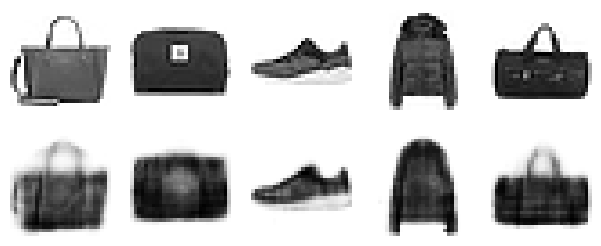

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def plot_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = np.clip(model.predict(images[:n_images]), 0, 1)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        # Original image
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index].reshape(28, 28), cmap="binary")
        plt.axis("off")
        
        # Reconstructed image (reshaped from flattened vector to 28x28)
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index].reshape(28, 28), cmap="binary")
        plt.axis("off")

plot_reconstructions(stacked_ae)
plt.show()

^ if we make this less blury it will become too perfect and more difficult to find useful patterns

lets use an autoencoder to reduce the dimensionality down to a reasonable level, then use another dimensionality reduction algorithm for visualization.

In [36]:
from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE(init="pca", learning_rate="auto", random_state=42)
X_valid_2D = tsne.fit_transform(X_valid_compressed)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step


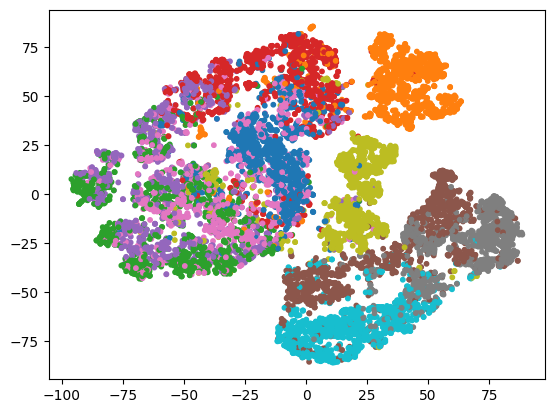

In [37]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.show()

When an autoencoder is neatly symmetrical, a common technique is to tie the weights of the decoder layers to the weights of the encoder layers.

This halves the number of weights in the model, speeding up training and limiting the risk of overfitting.

In [38]:
class DenseTranspose(tf.keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.dense = dense
        self.activation = tf.keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias", shape=self.dense.input_shape[-1], initializer="zeros")
        super().build(batch_input_shape)

    def call(self, inputs):
        Z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(Z + self.biases)

^ reuse the weights of a pre-trained Dense layer and apply its transpose operation.

This model achieves about the same reconstruction error as the prev model, using almost half the number of parameters:

In [41]:
dense_1 = tf.keras.layers.Dense(100, activation="relu")
dense_2 = tf.keras.layers.Dense(30, activation="relu")

tied_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    dense_1,
    dense_2
])

tied_decoder = tf.keras.Sequential([
    DenseTranspose(dense_2, activation="relu"),
    DenseTranspose(dense_1),
    tf.keras.layers.Reshape([28, 28])
])

tied_ae = tf.keras.Sequential([tied_encoder, tied_decoder])

### greedy layerwise training

not so much used anymore but you can train one autoencoder at a time then stack them in a single autoencoder

### Convolutional Autoencoders

for images of course

In [45]:
conv_encoder = tf.keras.Sequential([
    tf.keras.layers.Reshape([28, 28, 1]),
    tf.keras.layers.Conv2D(16, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2), # 14 x 14 x 16
    tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2), # 7 x 7 x 32
    tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2), # 3 x 3 x 64
    tf.keras.layers.Conv2D(30, 3, padding="same", activation="relu"),
    tf.keras.layers.GlobalAvgPool2D() # 30
])

conv_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(3 * 3 * 16),
    tf.keras.layers.Reshape((3, 3, 16)),
    tf.keras.layers.Conv2DTranspose(32, 3, strides=2, activation="relu"),
    tf.keras.layers.Conv2DTranspose(16, 3, strides=2, padding="same", activation="relu"),
    tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding="same"),
    tf.keras.layers.Reshape([28, 28])
])
conv_ae = tf.keras.Sequential([conv_encoder, conv_decoder])

### Denoising Autoencoders

force the autoencoder to learn useful features is to add noise to its inputs, training it to recover the original, noise-free inputs. 

In [46]:
dropout_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu")
])

dropout_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
dropout_ae = tf.keras.Sequential([dropout_encoder, dropout_decoder])

### Sparse Autoencoders

autoencoder is pushed to reduce the number of active neurons in the coding layer.

Once we have the mean activation per neuron, we want to penalize the neurons that
are too active, or not active enough, by adding a sparsity loss to the cost function.

A better approach is to use the Kullback–Leibler (KL) divergence

In [47]:
sparse_l1_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(300, activation="sigmoid"),
    tf.keras.layers.ActivityRegularization(l1=1e-4)
])

sparse_l1_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])

sparse_l1_ae = tf.keras.Sequential([sparse_l1_encoder, sparse_l1_decoder])

custom regularizer to apply KL divergence regularization:

In [48]:
kl_divergence = tf.keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, weight, target):
        self.weight = weight
        self.target = target

    def __call__(self, inputs):
        mean_activities = tf.reduce_mean(inputs, axis=0)
        return self.weight * (
            kl_divergence(self.target, mean_activities) +
            kl_divergence(1. - self.target, 1. - mean_activities)
        )

sparse autoencoder using KL divergence

In [49]:
kld_reg = KLDivergenceRegularizer(weight=5e-3, target=0.1)

sparse_kl_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(300, activation="sigmoid", activity_regularizer=kld_reg)
])

sparse_kl_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])

sparse_kl_ae = tf.keras.Sequential([sparse_kl_encoder, sparse_kl_decoder])

^ the coding layer will have roughly 10% sparsity.

### Variational Autoencoders (VAE)

performs variational Bayesian inference. Bayesian inference means updating a probability distribution based on new data

probabilistic autoencoders, their outputs are partly determined by change even after training

generative autoencoders, can generate new instances

The cost function of a variational autoencoder (VAE) consists of two parts: reconstruction loss, which ensures the autoencoder accurately reproduces its inputs (often using MSE), and latent loss, which encourages the codings to follow a Gaussian distribution using KL divergence. The addition of Gaussian noise limits the information transmitted, making the model more robust and capable of generating diverse outputs.

samples a codings vector from the Gaussian distribution with mean μ and standard deviation σ:

In [52]:
class Sampling(tf.keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return tf.random.normal(tf.shape(log_var)) * tf.exp(log_var / 2) + mean

In [54]:
codings_size = 10
inputs = tf.keras.layers.Input(shape=[28, 28])
Z = tf.keras.layers.Flatten()(inputs)
Z = tf.keras.layers.Dense(150, activation="relu")(Z)
Z = tf.keras.layers.Dense(100, activation="relu")(Z)
codings_mean = tf.keras.layers.Dense(codings_size)(Z)
codings_log_var = tf.keras.layers.Dense(codings_size)(Z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = tf.keras.Model(
        inputs=[inputs],
        outputs=[codings_mean, codings_log_var, codings]
)

In [78]:
# decoder
decoder_inputs = tf.keras.layers.Input(shape=[codings_size])
x = tf.keras.layers.Dense(100, activation="relu")(decoder_inputs)
x = tf.keras.layers.Dense(150, activation="relu")(x)
x = tf.keras.layers.Dense(28 * 28)(x)
outputs = tf.keras.layers.Reshape([28, 28])(x)
variational_decoder = tf.keras.Model(inputs=[decoder_inputs], outputs=[outputs])

In [79]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions])

latent loss and the reconstruction loss:

In [93]:
# Define the KL Divergence Loss
# latent_loss = -0.5 * tf.reduce_sum(
#     1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean), axis=-1
# )
# variational_ae.add_loss(tf.reduce_mean(latent_loss) / 784.)

# variational_ae.compile(loss="mse", optimizer="nadam")
# history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
# validation_data=(X_valid, X_valid))

X_train = X_train.reshape(-1, 28, 28, 1)
X_valid = X_valid.reshape(-1, 28, 28, 1)
def kl_loss(codings_mean, codings_log_var):
    kl_loss = -0.5 * tf.reduce_sum(
        1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean), axis=-1
    )
    return tf.reduce_mean(kl_loss) / 784.0

# Add the loss directly within the model's call method
class VariationalAutoencoder(keras.Model):
    def call(self, inputs):
        codings_mean, codings_log_var, codings = variational_encoder(inputs)
        reconstructions = variational_decoder(codings)
        
        # Compute KL loss
        kl_loss_value = kl_loss(codings_mean, codings_log_var)
        
        # Add loss to the model
        self.add_loss(kl_loss_value)
        
        return reconstructions

# Instantiate and compile the model
variational_ae = VariationalAutoencoder()
variational_ae.compile(optimizer="nadam", loss="mse")
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128, validation_data=(X_valid, X_valid))

# Summary of the model
variational_ae.summary()

Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2289 - val_loss: 0.2287
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2282 - val_loss: 0.2288
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2285 - val_loss: 0.2288
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2269 - val_loss: 0.2287
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2284 - val_loss: 0.2287
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2290 - val_loss: 0.2288
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2275 - val_loss: 0.2287
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2283 - val_loss: 0.2287
Epoch 9/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2277 - val_loss: 0.2289
Epoch 10/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2280 - val_loss: 0.2289
Epoch 11/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2284 - val_loss: 0.2287
Epoch 12/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Model: "variational_autoencoder_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

generate images that look like fashion items, sample from a Gaussian distribution and decode them:

In [91]:
codings = tf.random.normal(shape=[3 * 7, codings_size])
images = variational_decoder(codings).numpy()

In [94]:
codings = np.zeros([7, codings_size])
codings[:, 3] = np.linspace(-0.8, 0.8, 7)
images = variational_decoder(codings).numpy()

/Users/mathias/.pyenv/versions/3.12.0/lib/python3.12/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_247']
Received: inputs=Tensor(shape=(7, 10))
  warnings.warn(msg)


### GANs (Generative Adversal Networks)

Generator: takes a random distribution and outputs some data typically, an image.
(same functionality as a decoder in a variational autoencoder) tries to trick the Discriminator

Discriminator: takes a fake image from generator or a real image from training set as input, and must guess whether the input image is fake or real.

The generator never actually sees any real images, yet it gradually learns to produce convincing fake images

In [101]:
codings_size = 30

Dense = tf.keras.layers.Dense
generator = tf.keras.Sequential([
    Dense(100, activation="relu", kernel_initializer="he_normal"),
    Dense(150, activation="relu", kernel_initializer="he_normal"),
    Dense(28 * 28, activation="sigmoid"),
    tf.keras.layers.Reshape([28, 28])
])

discriminator = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    Dense(150, activation="relu", kernel_initializer="he_normal"),
    Dense(100, activation="relu", kernel_initializer="he_normal"),
    Dense(1, activation="sigmoid")
])

gan = tf.keras.Sequential([generator, discriminator])

In [102]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [103]:
# cannot use regular fit(), we must use a custom training loop
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size=1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [118]:
def train_gan(gan, dataset, batch_size, coding_size, n_epochs):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        for X_batch in dataset:
            # Ensure the batch size is consistent, and skip small batches (if the dataset is not divisible perfectly)
            if X_batch.shape[0] != batch_size:
                continue  # Skip this iteration if batch size is inconsistent

            # Flatten real images (28, 28, 1) to (batch_size, 784)
            X_batch_flattened = tf.reshape(X_batch, (batch_size, -1))

            # Phase 1 - training discriminator
            noise = tf.random.normal(shape=[batch_size, coding_size])
            generated_images = generator(noise)  # Generate fake images
            generated_images_flattened = tf.reshape(generated_images, (batch_size, -1))

            # Concatenate real and fake images
            X_fake_and_real = tf.concat([generated_images_flattened, X_batch_flattened], axis=0)  # Shape: (batch_size*2, 784)

            # Labels for real and fake images (shape should match X_fake_and_real)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)  # Shape: (batch_size*2, 1)

            # Ensure consistency in batch sizes
            print(f"X_fake_and_real shape: {X_fake_and_real.shape}, y1 shape: {y1.shape}")
            assert X_fake_and_real.shape[0] == y1.shape[0], f"Mismatch in batch sizes: {X_fake_and_real.shape[0]} vs {y1.shape[0]}"

            # Train the discriminator
            discriminator.train_on_batch(X_fake_and_real, y1)

            # Phase 2 - training generator
            noise = tf.random.normal(shape=[batch_size, coding_size])  # Latent space noise
            y2 = tf.constant([[1.]] * batch_size)  # Labels for generator training (fake -> real)

            # Train the GAN (generator)
            gan.train_on_batch(noise, y2)

train_gan(gan, dataset, batch_size=128, coding_size=30, n_epochs=50)

2025-02-14 23:00:36.072212: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In phase one we feed Gaussian noise to the generator to produce fake images, and we complete this batch by concatenating an equal number of real images.

In phase two, we feed the GAN some Gaussian noise. Its generator will start by
producing fake images, then the discriminator will try to guess whether these
images are fake or real.

In [119]:
codings = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator.predict(codings)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


### Deep Convolutional GANs (DCGAN)

In [120]:
codings_size = 100

generator = tf.keras.Sequential([
    tf.keras.layers.Dense(7 * 7 * 128),
    tf.keras.layers.Reshape([7, 7, 128]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="same", activation="tanh"),
])
discriminator = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="same", activation=tf.keras.layers.LeakyReLU(0.2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="same", activation=tf.keras.layers.LeakyReLU(0.2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

gan = tf.keras.Sequential([generator, discriminator])

In [121]:
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1.

### These techniques can be used to produce high definition images of faces (convincing)

Mini-batch standard deviation layer

Equalized learning rate

Pixelwise normalization layer

### StyleGANs

adding noise independently from the codings is very important, if noise came from the codings,
it meant that the generator had to dedicate a significant portion of the codings' repre‐
sentational power to storing noise, which this is quite wasteful.

Noise is broadcasted to all feature maps

generator is composed of two networks:

Mapping Network

Synthesis Network

### Diffusion Models

denoising diffusion probabilistic model (DDPMs) beat GANs: not only are DDPMs much easier to train than GANs, but the generated images are more diverse and of even higher quality. The main downside of DDPMs they take a very long time to generate images, compared to GANs or VAEs

the sum of multiple Gaussian distributions is also a Gaussian distribution

In the forward diffusion process we add more and more Gaussian noise with mean 0 and variance β
This noise is independent for each pixel: isotropic. You first obtain the image x1, then x2,
and so on, until the cat is completely hidden by the noise, impossible to see.

Wwe're gradually drowning the image in noise: this is called the forward process.

### Probability distribution q of the forward diffusion process
$$
q(\mathbf{x}_t \mid \mathbf{x}_0) = \mathcal{N}(\sqrt{\bar{\alpha}_t} \mathbf{x}_0, (1 - \bar{\alpha}_t) \mathbf{I})
$$

### Variance Schedule Definitions:
$$
\alpha_t = 1 - \beta_t
$$

$$
\bar{\alpha}_t = \prod_{s=1}^{t} \alpha_s
$$

### Cosine-Based Variance Schedule

The function controlling the noise schedule is:

$$
f(t) = \cos\left(\frac{\pi}{2} \cdot \frac{t/T + s}{1 + s} \right)
$$

The cumulative noise schedule is:

$$
\bar{\alpha}_t = f(t)^2
$$

And the per-step variance is:

$$
\beta_t = 1 - \frac{\bar{\alpha}_t}{\bar{\alpha}_{t-1}}
$$

In [123]:
def variance_schedule(T, s=0.008, max_beta=0.999):
    t = np.arange(T + 1)
    f = np.cos((t / T + s) / (1 + s) * np.pi / 2) ** 2
    alpha = np.clip(f[1:] / f[:-1], 1 - max_beta, 1)
    alpha = np.append(1, alpha).astype(np.float32)
    beta = 1 - alpha
    alpha_cumprod = np.cumprod(alpha)
    return alpha, alpha_cumprod, beta

T = 4000
alpha, alpha_cumprod, beta = variance_schedule(T)

to train our model to reverse the diffusion process, we will need noisy images from different time steps of the forward process. 

In [131]:
# def prepare_batch(X):
#     X = tf.cast(X[..., tf.newaxis], tf.float32) * 2 - 1 # scale from -1 to +1
#     X_shape = tf.shape(X)
#     t = tf.random.uniform([X_shape[0]], minval=1, maxval=T + 1, dtype=tf.int32)
#     alpha_cm = tf.gather(alpha_cumprod, t)
#     alpha_cm = tf.reshape(alpha_cm, [X_shape[0]] + [1] * (len(X_shape) - 1))
#     noise = tf.random.normal(X_shape)
#     return {
#         "X_noisy": alpha_cm ** 0.5 * X + (1 - alpha_cm) ** 0.5 * noise, # x ** 0.5 = sqrt(x)
#         "time": t
#     }, noise

def prepare_batch(X):
    X = tf.cast(X, tf.float32) / 127.5 - 1  # Normalize to [-1, 1]
    
    # Ensure shape is (batch_size, 28, 28, 1)
    X = tf.reshape(X, [-1, 28, 28, 1])  
    
    X_shape = tf.shape(X)
    t = tf.random.uniform([X_shape[0]], minval=1, maxval=T + 1, dtype=tf.int32)
    
    alpha_cm = tf.gather(alpha_cumprod, t)
    alpha_cm = tf.reshape(alpha_cm, [X_shape[0]] + [1] * (len(X_shape) - 1))
    
    noise = tf.random.normal(X_shape)
    X_noisy = alpha_cm ** 0.5 * X + (1 - alpha_cm) ** 0.5 * noise  # Apply noise

    return {"X_noisy": X_noisy, "time": t}, noise

In [132]:
def prepare_dataset(X, batch_size=32, shuffle=False):
    ds = tf.data.Dataset.from_tensor_slices(X)
    if shuffle:
        ds = ds.shuffle(buffer_size=10_000)
    return ds.batch(batch_size).map(prepare_batch).prefetch(1)

train_set = prepare_dataset(X_train, batch_size=32, shuffle=True)
valid_set = prepare_dataset(X_valid, batch_size=32)

In [133]:
# def build_diffusion_model():
#     X_noisy = tf.keras.layers.Input(shape=[28, 28, 1], name="X_noisy")
#     time_input = tf.keras.layers.Input(shape=[], dtype=tf.int32, name="time")
#     [...] # build model based on noisy images and time steps
#     ouputs = [...] # predict the noise (same shape as the input images)
#     return tf.keras.Model(inputs=[X_noisy, time_input], outputs=[outputs])
from tensorflow import keras
from tensorflow.keras import layers

def sinusoidal_embedding(timesteps, dim):
    """Creates sinusoidal time embeddings."""
    half_dim = dim // 2
    freqs = tf.exp(tf.linspace(tf.math.log(1.0), tf.math.log(1000.0), half_dim))
    angles = tf.cast(timesteps, tf.float32)[:, None] * freqs[None, :]
    return tf.concat([tf.sin(angles), tf.cos(angles)], axis=-1)

def build_diffusion_model():
    X_noisy = layers.Input(shape=[28, 28, 1], name="X_noisy")
    time_input = layers.Input(shape=[], dtype=tf.int32, name="time")

    # Time embedding
    time_emb_dim = 32
    time_embedding = layers.Lambda(lambda t: sinusoidal_embedding(t, time_emb_dim))(time_input)
    time_embedding = layers.Dense(128, activation="swish")(time_embedding)
    time_embedding = layers.Dense(128, activation="swish")(time_embedding)

    # Initial conv layer
    x = layers.Conv2D(64, kernel_size=3, padding="same", activation="swish")(X_noisy)

    # Downsampling
    x = layers.Conv2D(128, kernel_size=3, strides=2, padding="same", activation="swish")(x)
    x = layers.Conv2D(128, kernel_size=3, padding="same", activation="swish")(x)

    # Inject time embedding
    time_emb = layers.Dense(128, activation="swish")(time_embedding)
    time_emb = layers.Reshape((1, 1, 128))(time_emb)
    x = layers.Add()([x, time_emb])

    # Bottleneck
    x = layers.Conv2D(256, kernel_size=3, padding="same", activation="swish")(x)
    x = layers.Conv2D(256, kernel_size=3, padding="same", activation="swish")(x)

    # Upsampling
    x = layers.Conv2DTranspose(128, kernel_size=3, strides=2, padding="same", activation="swish")(x)
    x = layers.Conv2D(128, kernel_size=3, padding="same", activation="swish")(x)

    # Final output layer (predict noise)
    outputs = layers.Conv2D(1, kernel_size=3, padding="same", activation=None)(x)

    return keras.Model(inputs=[X_noisy, time_input], outputs=[outputs])

In [135]:
model = build_diffusion_model()
model.compile(loss=tf.keras.losses.Huber(), optimizer="nadam")
history = model.fit(train_set, validation_data=valid_set, epochs=10) # epochs=100 scaled down to 10

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 370s 246ms/step - loss: 0.0584 - val_loss: 0.0071
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 368s 245ms/step - loss: 0.0170 - val_loss: 0.4248
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 375s 250ms/step - loss: 0.4245 - val_loss: 0.4245
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 379s 252ms/step - loss: 0.4248 - val_loss: 0.4246
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 379s 252ms/step - loss: 0.4248 - val_loss: 0.4248
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 377s 252ms/step - loss: 0.4246 - val_loss: 0.4247
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 377s 251ms/step - loss: 0.4246 - val_loss: 0.4249
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 378s 252ms/step - loss: 0.4246 - val_loss: 0.4246
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 366s 244ms/step - loss: 0.4246 - val_loss: 0.4246
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 377s 251ms/step - loss: 0.4248 - val_loss: 0.4245


reverse the process

In [136]:
def generate(model, batch_size=32):
    X = tf.random.normal([batch_size, 28, 28, 1])
    for t in range(T, 0, -1):
        noise = (tf.random.normal if t > 1 else tf.zeros)(tf.shape(X))
        X_noise = model({"X_noisy": X, "time": tf.constant([t] * batch_size)})
        X = (
            1 / alpha[t] ** 0.5
            * (X - beta[t] / (1 - alpha_cumprod[t]) ** 0.5 * X_noise)
            + (1 - alpha[t]) ** 0.5 * noise
        )
    return X

X_gen = generate(model)